### Import Data

In [602]:
import pandas as pd #Importing Pandas package

Bookfile=[] #Empty "Book" list - Prepare for loop

# Loops through importing 7 HP text files - Book 1 creates table, Books 2-7 append to Book 1 table
for i in range(1,8): 
    Bookfile.append('HPBook'+str(i)+'.txt')
    if i == 1:
        df = pd.read_csv(Bookfile[i-1], sep="@")
    else:
        df2 = pd.read_csv(Bookfile[i-1], sep="@")
        df = pd.concat([df, df2])

### Import NLTK and Its Text Analysis Components

In [603]:
import nltk #Import NLTK library
#nltk.download() #installed punkt on the models tab to fix error

stopwords = nltk.download('stopwords') #Download stopwords
from nltk.corpus import stopwords #Import stopwords to Python

stopwords = set(stopwords.words('english')) #English stopwords assigned to "stopwords" object

import string #Punctuation

stopwords = [''.join(item for item in x if item not in string.punctuation) for x in stopwords] #Remove punctuation from stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cluel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Creating Analysis Fields - Word Count and Word Clouds

In order to do an appropriate analysis, punctuation is removed and case is lowered.

For the word cloud analysis specifically, stop words are removed ("The", "And", "So", etc.)

In [672]:
def remove_punctuations(text): # Function for removing punctuation
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

df['WordCountText']=df['Text'].str.lower().apply(remove_punctuations).apply(word_tokenize) # Word Count Text
# Word Count
df['WordCloudText']=df['WordCountText'].apply(lambda x: [item for item in x if item not in stopwords]) # Word Cloud Text
df['WordCount'] = df['WordCountText'].str.len() #Word Count Per Chapter

df.reset_index()

,index,Text,Chapter,Book,WordCountText,WordCloudText,WordCount
0,0,"THE BOY WHO LIVED Mr. and Mrs. Dursley, of nu...",1,1,"[the, boy, who, lived, mr, and, mrs, dursley, ...","[boy, lived, mr, mrs, dursley, number, four, p...",4591
1,1,THE VANISHING GLASS Nearly ten years had pass...,2,1,"[the, vanishing, glass, nearly, ten, years, ha...","[vanishing, glass, nearly, ten, years, passed,...",3445
2,2,THE LETTERS FROM NO ONE The escape of the Bra...,3,1,"[the, letters, from, no, one, the, escape, of,...","[letters, one, escape, brazilian, boa, constri...",3842
3,3,THE KEEPER OF THE KEYS BOOM. They knocked aga...,4,1,"[the, keeper, of, the, keys, boom, they, knock...","[keeper, keys, boom, knocked, dudley, jerked, ...",3690
4,4,DIAGON ALLEY Harry woke early the next mornin...,5,1,"[diagon, alley, harry, woke, early, the, next,...","[diagon, alley, harry, woke, early, next, morn...",6570
5,5,THE JOURNEY FROM PLATFORM NINE AND THREE-QUART...,6,1,"[the, journey, from, platform, nine, and, thre...","[journey, platform, nine, threequarters, harry...",6283
6,6,THE SORTING HAT The door swung open at once. ...,7,1,"[the, sorting, hat, the, door, swung, open, at...","[sorting, hat, door, swung, open, tall, blackh...",4469
7,7,"THE POTIONS MASTER There, look.\ \""Where?\"" ...",8,1,"[the, potions, master, there, look, where, nex...","[potions, master, look, next, tall, kid, red, ...",3064
8,8,THE MIDNIGHT DUEL Harry had never believed he...,9,1,"[the, midnight, duel, harry, had, never, belie...","[midnight, duel, harry, never, believed, would...",4903
9,9,HALLOWEEN Malfoy couldn't believe his eyes wh...,10,1,"[halloween, malfoy, couldnt, believe, his, eye...","[halloween, malfoy, believe, eyes, saw, harry,...",4282


In [673]:
df.head(5) #Look at top 5 rows - Make sure everything looks appropriate

,Text,Chapter,Book,WordCountText,WordCloudText,WordCount
0,"THE BOY WHO LIVED Mr. and Mrs. Dursley, of nu...",1,1,"[the, boy, who, lived, mr, and, mrs, dursley, ...","[boy, lived, mr, mrs, dursley, number, four, p...",4591
1,THE VANISHING GLASS Nearly ten years had pass...,2,1,"[the, vanishing, glass, nearly, ten, years, ha...","[vanishing, glass, nearly, ten, years, passed,...",3445
2,THE LETTERS FROM NO ONE The escape of the Bra...,3,1,"[the, letters, from, no, one, the, escape, of,...","[letters, one, escape, brazilian, boa, constri...",3842
3,THE KEEPER OF THE KEYS BOOM. They knocked aga...,4,1,"[the, keeper, of, the, keys, boom, they, knock...","[keeper, keys, boom, knocked, dudley, jerked, ...",3690
4,DIAGON ALLEY Harry woke early the next mornin...,5,1,"[diagon, alley, harry, woke, early, the, next,...","[diagon, alley, harry, woke, early, next, morn...",6570


### Word Count Graphs

In [674]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Number of Words in Each Harry Potter Book

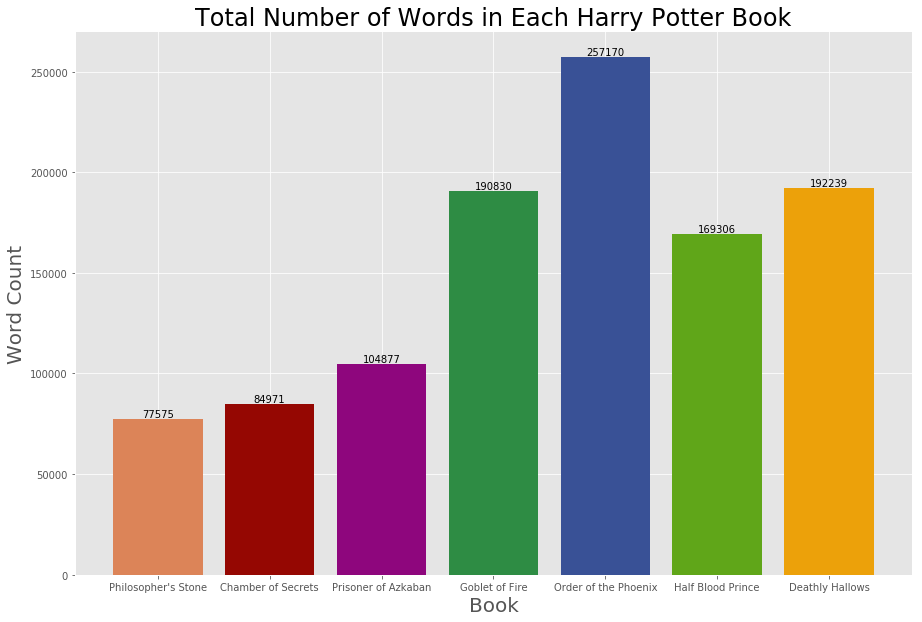

In [675]:
plt.rcParams['figure.figsize']=(15,10) #Sets default for the size of the graph
matplotlib.rcParams['axes.titlesize']=24 #Sets default for the size of the title
matplotlib.rcParams['axes.labelsize']=20 #Sets default for the size of the x/y axis labels

BookTitles=["Philosopher's Stone", "Chamber of Secrets", "Prisoner of Azkaban", "Goblet of Fire",
           "Order of the Phoenix", "Half Blood Prince", "Deathly Hallows"]

x = df.groupby(['Book'])['WordCount'].sum().reset_index()['Book']
y = df.groupby(['Book'])['WordCount'].sum().reset_index()['WordCount']
x_pos = np.arange(len(x))
barchart=plt.bar(x_pos, y, color=['#DC8458', '#950702', '#8E067D', '#2E8C44', '#395196', '#60A619','#ECA10A'])
plt.xlabel("Book")
plt.ylabel("Word Count")
plt.title("Total Number of Words in Each Harry Potter Book")
plt.xticks(x_pos, BookTitles)

# Add counts above the two bar graphs
for bar in barchart:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
    
plt.savefig('HPtotalwords.png')

Average Number of Words Per Chapter of Harry Potter

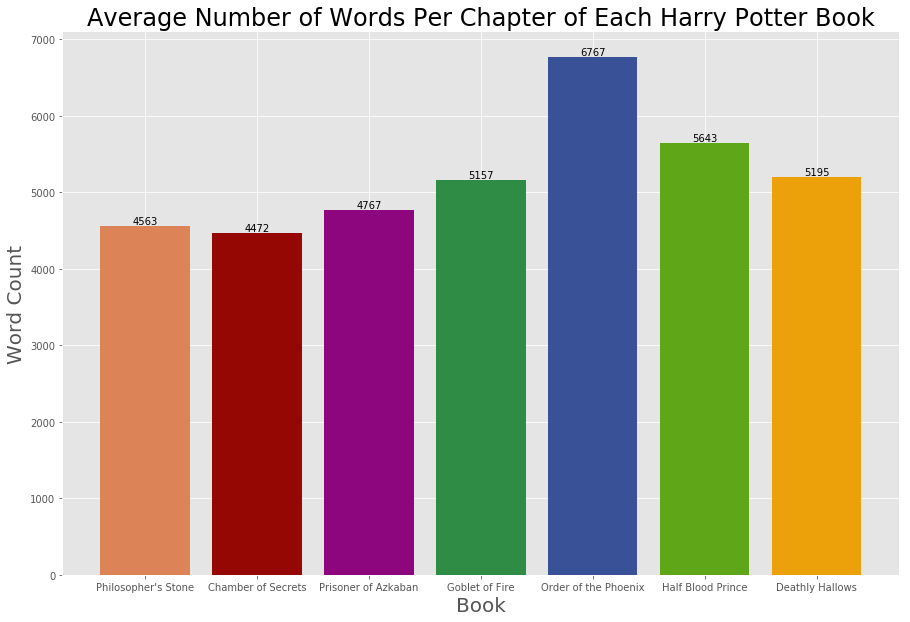

In [676]:
BookTitles=["Philosopher's Stone", "Chamber of Secrets", "Prisoner of Azkaban", "Goblet of Fire",
           "Order of the Phoenix", "Half Blood Prince", "Deathly Hallows"]

x = df.groupby(['Book'])['WordCount'].mean().reset_index()['Book']
y = df.groupby(['Book'])['WordCount'].mean().reset_index()['WordCount']
x_pos = np.arange(len(x))
barchart=plt.bar(x_pos, y, color=['#DC8458', '#950702', '#8E067D', '#2E8C44', '#395196', '#60A619','#ECA10A'])
plt.xlabel("Book")
plt.ylabel("Word Count")
plt.title("Average Number of Words Per Chapter of Each Harry Potter Book")
plt.xticks(x_pos, BookTitles)

# Add counts above the two bar graphs
for bar in barchart:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.savefig('HPavgwords.png')

Shortest Chapter of Each Harry Potter Book

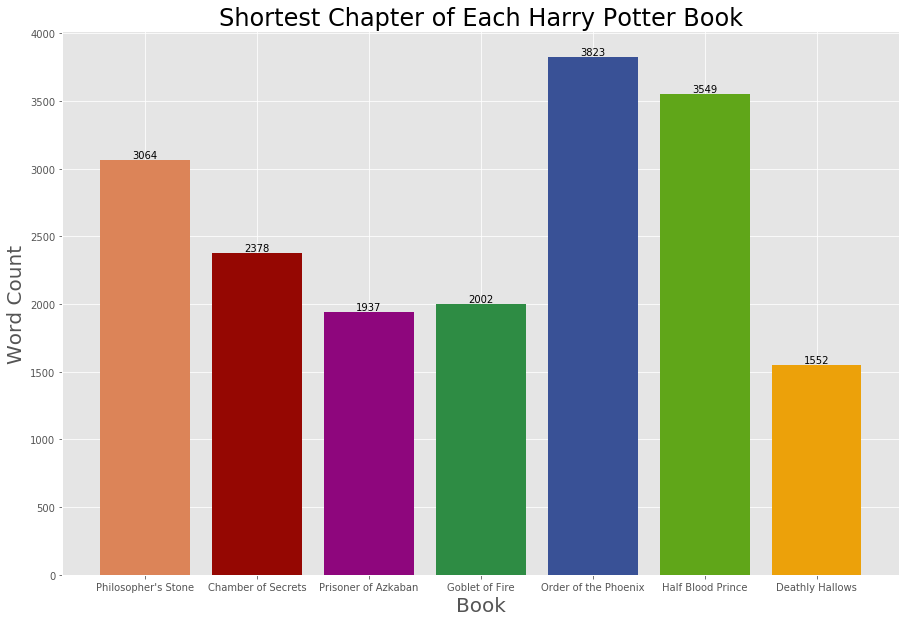

In [677]:
BookTitles=["Philosopher's Stone", "Chamber of Secrets", "Prisoner of Azkaban", "Goblet of Fire",
           "Order of the Phoenix", "Half Blood Prince", "Deathly Hallows"]

x = df.groupby(['Book'])['WordCount'].min().reset_index()['Book']
y = df.groupby(['Book'])['WordCount'].min().reset_index()['WordCount']
x_pos = np.arange(len(x))
barchart=plt.bar(x_pos, y, color=['#DC8458', '#950702', '#8E067D', '#2E8C44', '#395196', '#60A619','#ECA10A'])
plt.xlabel("Book")
plt.ylabel("Word Count")
plt.title("Shortest Chapter of Each Harry Potter Book")
plt.xticks(x_pos, BookTitles)

# Add counts above the two bar graphs
for bar in barchart:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.savefig('HPshortchaps.png')

Longest Chapter of Each Harry Potter Book

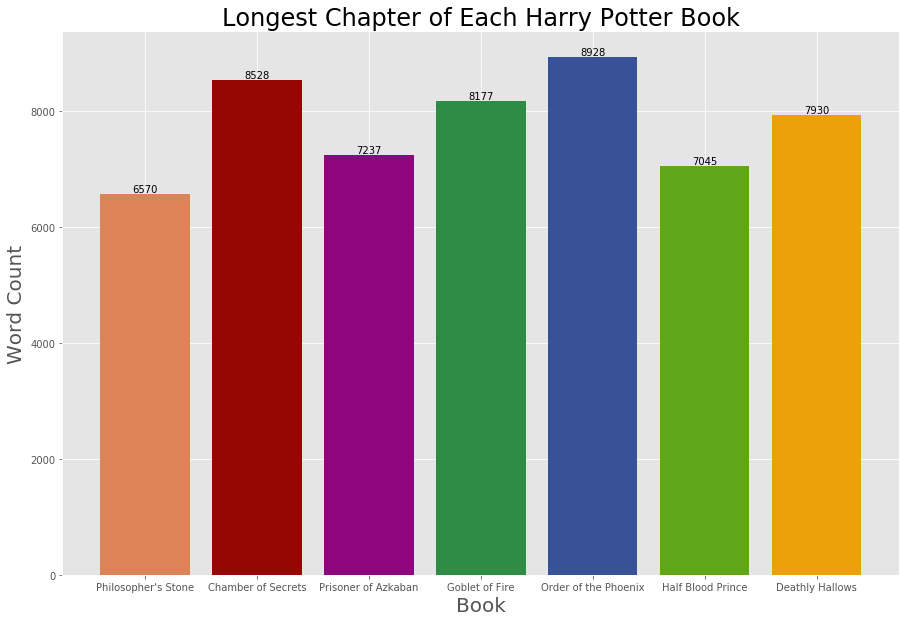

In [678]:
BookTitles=["Philosopher's Stone", "Chamber of Secrets", "Prisoner of Azkaban", "Goblet of Fire",
           "Order of the Phoenix", "Half Blood Prince", "Deathly Hallows"]

x = df.groupby(['Book'])['WordCount'].max().reset_index()['Book']
y = df.groupby(['Book'])['WordCount'].max().reset_index()['WordCount']
x_pos = np.arange(len(x))
barchart=plt.bar(x_pos, y, color=['#DC8458', '#950702', '#8E067D', '#2E8C44', '#395196', '#60A619','#ECA10A'])
plt.xlabel("Book")
plt.ylabel("Word Count")
plt.title("Longest Chapter of Each Harry Potter Book")
plt.xticks(x_pos, BookTitles)

# Add counts above the two bar graphs
for bar in barchart:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
    
plt.savefig('HPlongchaps.png')

In [679]:
# Which chapter was the shortest?
one = df.groupby(['Book'])['WordCount'].min().reset_index()['Book']
two = df.groupby(['Book'])['WordCount'].min().reset_index()['WordCount']

del MinChaps

MinChaps=pd.DataFrame()

for (a, b) in zip(one, two): 
     MinChaps = pd.concat([MinChaps, df[(df.WordCount == b) & (df.Book == a)]])

MinChaps

,Text,Chapter,Book,WordCountText,WordCloudText,WordCount
7,"THE POTIONS MASTER There, look.\ \""Where?\"" ...",8,1,"[the, potions, master, there, look, where, nex...","[potions, master, look, next, tall, kid, red, ...",3064
13,"still, heart-shaped confetti was falling from ...",14,2,"[still, heartshaped, confetti, was, falling, f...","[still, heartshaped, confetti, falling, pale, ...",2378
19,THE DEMENTOR'S KISS Harry had never been pa...,20,3,"[the, dementors, kiss, harry, had, never, been...","[dementors, kiss, harry, never, part, stranger...",1937
31,Harry felt his feet slam into the ground; h...,32,4,"[harry, felt, his, feet, slam, into, the, grou...","[harry, felt, feet, slam, ground, injured, leg...",2002
35,The Only OneHe Ever Feared'He hasn't gone!' Ha...,36,5,"[the, only, onehe, ever, fearedhe, hasnt, gone...","[onehe, ever, fearedhe, gone, harry, yelled, b...",3823
27,Harry felt as though he too were hurtling thr...,28,6,"[harry, felt, as, though, he, too, were, hurtl...","[harry, felt, though, hurtling, space, happene...",3549
36,Autumn seemed to arrive suddenly that year. Th...,37,7,"[autumn, seemed, to, arrive, suddenly, that, y...","[autumn, seemed, arrive, suddenly, year, morni...",1552


In [680]:
#Which chapter was the longest?
one = df.groupby(['Book'])['WordCount'].max().reset_index()['Book']
two = df.groupby(['Book'])['WordCount'].max().reset_index()['WordCount']

del MaxChaps

MaxChaps=pd.DataFrame()

for (a, b) in zip(one, two): 
     MaxChaps = pd.concat([MaxChaps, df[(df.WordCount == b) & (df.Book == a)]])
        
MaxChaps

,Text,Chapter,Book,WordCountText,WordCloudText,WordCount
4,DIAGON ALLEY Harry woke early the next mornin...,5,1,"[diagon, alley, harry, woke, early, the, next,...","[diagon, alley, harry, woke, early, next, morn...",6570
18,"\What d'you mean, I won't be -?\"" \""I've wa...",19,2,"[what, dyou, mean, i, wont, be, ive, waited, a...","[dyou, mean, ive, waited, long, time, harry, p...",8528
20,HERMIONE'S SECRET Shocking business... shoc...,21,3,"[hermiones, secret, shocking, business, shocki...","[hermiones, secret, shocking, business, shocki...",7237
22,Despite the very heavy load of homework tha...,23,4,"[despite, the, very, heavy, load, of, homework...","[despite, heavy, load, homework, fourth, years...",8177
12,Dentention with DeloresDinner in the Great Hal...,13,5,"[dentention, with, deloresdinner, in, the, gre...","[dentention, deloresdinner, great, hall, night...",8928
17,The next day Harry confided in both Ron and H...,18,6,"[the, next, day, harry, confided, in, both, ro...","[next, day, harry, confided, ron, hermione, ta...",7045
32,"Harry remained kneeling at Snape's side, simpl...",33,7,"[harry, remained, kneeling, at, snapes, side, ...","[harry, remained, kneeling, snapes, side, simp...",7930


### Word Clouds

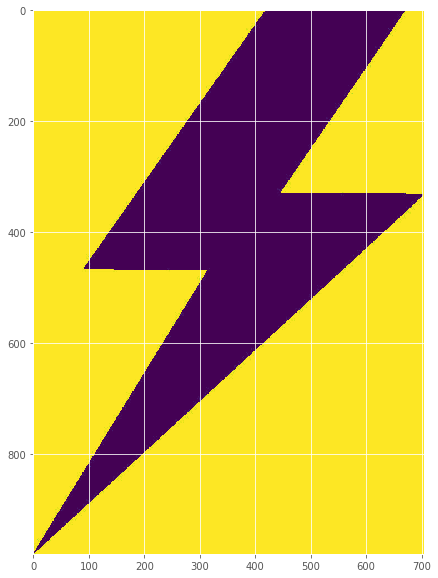

In [1054]:
# Import packages/libraries
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

# Delete "photo" object (to debug mask)
del(photo)

# Bring in mask data
photo = Image.open("Thunderbolt - Copy.jpg")
mask = np.array(photo)

plt.imshow(photo)

Prepare format of word cloud

In [1325]:
# Create Dictionary and list
wordcount={}
list = []

# Get Words Ready
for x in df.WordCloudText:
    list.extend(x)
    
# Clean text
textcount=str(list).split()
textcount=[''.join(c for c in s if c not in string.punctuation) for s in textcount] #Remove punctuation

# Wordcount Loop
# If the word is not in the stop words, it's added to the dictionary with a count.
# If the word already exists in the dictionary, the count is made one higher.

for word in textcount:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

# Clean messy words out of dictionary - FOR HP ONLY
del wordcount['¨c']
del wordcount['—']
del wordcount['ter']
    
# Printing 20 Most Common words in "Harry Potter"
Counts = collections.Counter(wordcount)

for word, count in Counts.most_common(250):
    print(word, ": ", count)

harry :  15979
said :  14366
ron :  5579
hermione :  4759
back :  3168
dumbledore :  2805
could :  2802
one :  2519
like :  2356
looked :  2344
would :  2258
know :  2231
around :  2170
got :  2109
well :  2075
professor :  1988
see :  1910
though :  1804
think :  1727
get :  1692
hagrid :  1691
still :  1682
time :  1666
looking :  1596
right :  1591
eyes :  1579
wand :  1562
face :  1488
snape :  1474
going :  1464
weasley :  1426
voice :  1417
harrys :  1415
look :  1412
go :  1406
room :  1318
come :  1308
head :  1287
door :  1277
thought :  1268
im :  1262
mr :  1252
saw :  1221
something :  1186
malfoy :  1146
behind :  1140
never :  1132
seemed :  1129
hand :  1110
way :  1106
away :  1102
told :  1094
asked :  1080
turned :  1070
hes :  1070
potter :  1046
last :  1042
much :  1031
dark :  1015
two :  1013
us :  1011
little :  1005
knew :  1003
long :  997
sirius :  996
even :  995
want :  993
tell :  968
voldemort :  947
good :  945
first :  934
made :  932
heard :  928
peopl

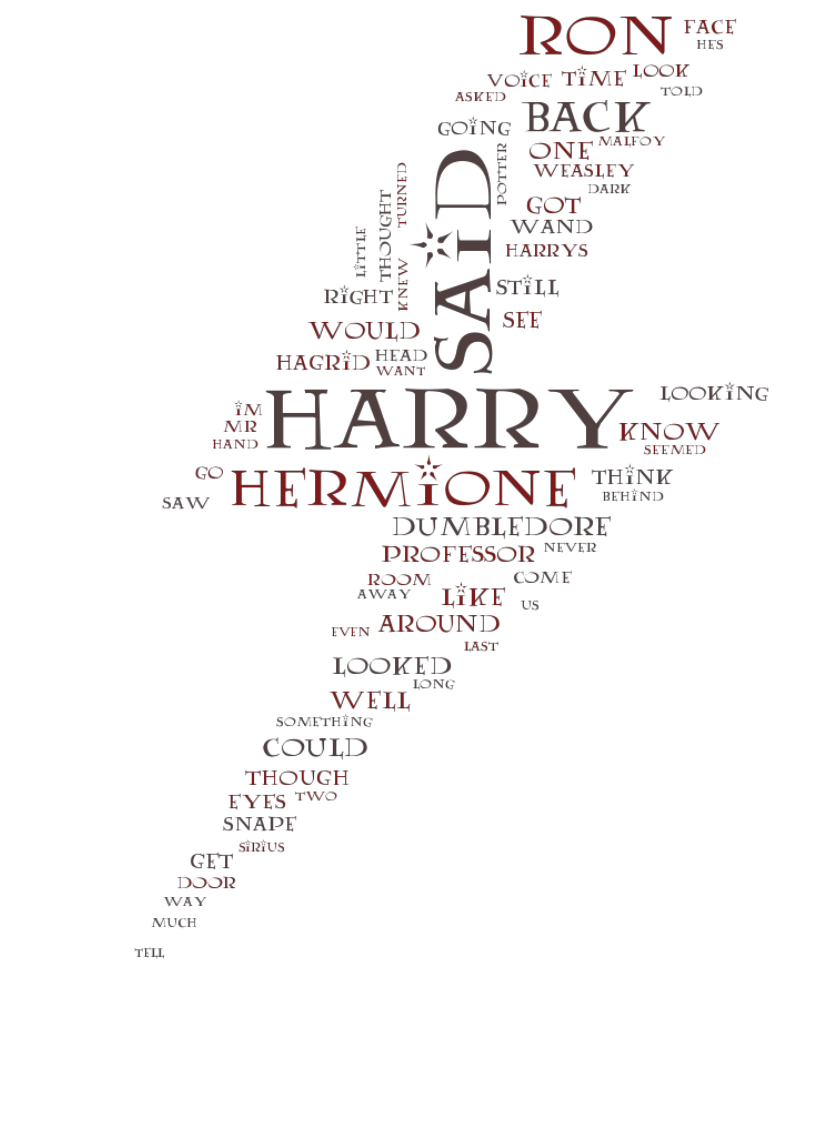

In [1321]:
# Create Color Maps
# Converted HTML/HEX colors to RGB using: https://htmlcolorcodes.com/
colorsList = ['#503F3F', '#801919'] #Mauraders Map Colors
ColorMap = matplotlib.colors.ListedColormap(colorsList)

# Create and generate a word cloud image:
wordcloud = WordCloud(mask=mask, margin=10, font_path='LUMOS.ttf', min_font_size=12, max_words=500, 
                      random_state=1, colormap=ColorMap, background_color=None, mode='RGBA').generate_from_frequencies(wordcount)

# Display the generated image:
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save image to file
wordcloud.to_file("HP_WordCloud.png")

### Creating the Final WordCloud Image

In [1319]:
# Bringing in background parchment and cropping
layer1 = Image.open("Background.jpg")
layer1 = layer1.crop((100,0,1216,1100))

# Bringing in WordCloud and cropping
layer2 = Image.open("HP_WordCloud.png")
layer2 = layer2.crop((0,0,704,870))

# Transposing parchment to portrait, resizing to match wordcloud, and converting type
layer1 = layer1.transpose(Image.ROTATE_90)
layer1 = layer1.resize((1004,870))
layer1 = layer1.convert('RGBA')

# Adding footsteps to parchment
shoes = Image.open("Footsteps4.png")
shoes = shoes.convert('RGBA')
shoes2 = shoes.transpose(Image.FLIP_LEFT_RIGHT)
shoes2 = shoes2.transpose(Image.ROTATE_270)
shoes3 = shoes.crop((0,0,184,177))
shoes3 = shoes3.transpose(Image.ROTATE_90)
shoes3 = shoes3.rotate(-45)
shoes4 = shoes.transpose(Image.FLIP_LEFT_RIGHT)
shoes4 = shoes4.transpose(Image.ROTATE_270)
shoes4 = shoes4.crop((0, 40,177,300))
shoes5 = shoes4.crop((40,100,100,300))
shoes5 = shoes5.rotate(-45)
shoes6 = shoes5

# Adding Maurader's Map Castle and logo
Maurader = Image.open("Mauraders_Map.png")
Maurader = Maurader.convert('RGBA')
Maurader = Maurader.resize((int(355*.92),int(405*.92)))
MauraderLogo = Image.open("Maurader_Logo3.png")
MauraderLogo = MauraderLogo.resize((int(688*.87),int(340*.87)))

# Compiling into one final image
final2 = Image.new("RGBA", layer1.size) # Creates new image
final2.paste(layer1, (0,0), layer1)
final2.paste(layer2, (300, 15), layer2)
final2.paste(shoes, (710, 700), shoes)
final2.paste(shoes2, (390, 0), shoes2)
final2.paste(shoes3, (260, 280), shoes3)
final2.paste(shoes4, (237, 460), shoes4)
final2.paste(shoes5, (175, 640), shoes5)
final2.paste(shoes6, (115, 650), shoes6)
final2.paste(shoes6, (55, 660), shoes6)
final2.paste(shoes6, (-5, 670), shoes6)
final2.paste(MauraderLogo, (-175, -10), MauraderLogo)
final2.paste(Maurader, (-30, 300), Maurader)
final2.show()

# Saving image
final2.save('HP_WordCloud_FINAL.png')

In [1341]:
# Which characters were mentioned most?

characters = ['harry', 'ron', 'hermione', 'sirius', 'luna', 'fred', 'george', 'cedric',
              'percy','voldemort', 'tom', 'peter', 'dumbledore', 'lupin', 'snape', 'trelawney', 'malfoy', 'hagrid',
              'crabbe', 'goyle', 'lockhart', 'mcgonagall','cho', 'ginny','dobby','moody','neville', 'lavender', 'colin',
             'dudley', 'vernon', 'petunia', 'lily', 'james','hooch', 'dean', 'seamus', 'viktor', 'fleur', 'charlie',
             'lockhart', 'narcissa', 'bellatrix', 'lucius', 'draco', 'pomfrey', 'quirrell', 'sprout', 'myrtle', 'umbridge',
             'molly', 'arthur', 'oliver']
CharDictionary = {x:wordcount[x] for x in characters}

Counts = collections.Counter(CharDictionary)

for word, count in Counts.most_common(15):
    print(word, ": ", count)

harry :  15979
ron :  5579
hermione :  4759
dumbledore :  2805
hagrid :  1691
snape :  1474
malfoy :  1146
sirius :  996
voldemort :  947
fred :  863
george :  702
lupin :  702
ginny :  679
mcgonagall :  665
neville :  650


In [1366]:
# Which spell-related words were mentioned most?

spells = ['alohomora', 'stupefy','avada','kedavra','riddikulus', 'obliviate', 'sectumsempra', 'lumos', 'expelliarmus',
         'wingardium', 'leviosa', 'accio', 'expecto', 'patronum', 'imperio', 'aguamenti', 'confundo', 'engorgio',
         'revelio', 'muffliato', 'reparo', 'petrificus', 'totalus', 'protego', 'reducio', 'scourgify']
SpellDictionary = {x:wordcount[x] for x in spells}

Counts = collections.Counter(SpellDictionary)

for word, count in Counts.most_common(10):
    print(word, ": ", count)

expecto :  41
patronum :  32
accio :  29
stupefy :  19
avada :  19
expelliarmus :  19
riddikulus :  18
kedavra :  15
lumos :  15
muffliato :  11


In [613]:
z = df.groupby(['Book'])['WordCount'].sum().reset_index()['WordCount']

In [614]:
df['WordCount'].mean()

5384.84

In [620]:
df[(df.Book == 6)]

,Text,Chapter,Book,WordCountText,WordCloudText,WordCount
0,It was nearing midnight and the Prime Ministe...,1,6,"[it, was, nearing, midnight, and, the, prime, ...","[nearing, midnight, prime, minister, sitting, ...",4901
1,Many miles away the chilly mist that had pres...,2,6,"[many, miles, away, the, chilly, mist, that, h...","[many, miles, away, chilly, mist, pressed, pri...",4781
2,Harry Potter was snoring loudly. He had been ...,3,6,"[harry, potter, was, snoring, loudly, he, had,...","[harry, potter, snoring, loudly, sitting, chai...",4656
3,Despite the fact that he had spent every waki...,4,6,"[despite, the, fact, that, he, had, spent, eve...","[despite, fact, spent, every, waking, moment, ...",5836
4,Harry and Dumbledore approached the back door...,5,6,"[harry, and, dumbledore, approached, the, back...","[harry, dumbledore, approached, back, door, bu...",5726
5,Harry remained within the confines of the Bur...,6,6,"[harry, remained, within, the, confines, of, t...","[harry, remained, within, confines, burrows, g...",5930
6,Harry spent a lot of the last week of the hol...,7,6,"[harry, spent, a, lot, of, the, last, week, of...","[harry, spent, lot, last, week, holidays, pond...",6300
7,Harry could not move a muscle. He lay there b...,8,6,"[harry, could, not, move, a, muscle, he, lay, ...","[harry, could, move, muscle, lay, beneath, inv...",4267
8,Harry and Ron met Hermione in the common room...,9,6,"[harry, and, ron, met, hermione, in, the, comm...","[harry, ron, met, hermione, common, room, brea...",5739
9,For or the rest of the week's Potions lessons...,10,6,"[for, or, the, rest, of, the, weeks, potions, ...","[rest, weeks, potions, lessons, harry, continu...",6020
